<h1> Data Analysis - Roads and Streets in Dublin City

<h3> Creating dataset - Explanatory Data Analysis

In [1]:
# Importing libraries for EDA and possible visualizations and calculations
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pydotplus
import six
import sys
import scipy.stats as stat
import pylab 
sys.modules['sklearn.externals.six'] = six
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 
import csv

%matplotlib inline
from fitter import Fitter, get_common_distributions, get_distributions
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  

# Fitting Naive Bayes Classification to the Training set with linear kernel
from sklearn.naive_bayes import GaussianNB

# Feature Scaling to bring the variable in a single scale
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 

# Importing datasets from DCC
roads_streets = pd.read_csv("roads_and_streets.csv",encoding='latin-1')
in_charge = pd.read_csv("roads-in-charge.csv")

In [2]:
roads_streets.shape

(4771, 13)

In [3]:
in_charge.shape

(4764, 10)

In [4]:
# Info from two datasets 
roads_streets.info()
in_charge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4771 entries, 0 to 4770
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   street_name        4771 non-null   object 
 1   street_class_code  4768 non-null   float64
 2   new_area_code      4771 non-null   int64  
 3   surface_type_code  4769 non-null   float64
 4   Subarea            4420 non-null   object 
 5   Subarea EA         4406 non-null   object 
 6   line_length        4595 non-null   float64
 7   route_no           360 non-null    object 
 8   year_built         617 non-null    float64
 9   os_sheets          4163 non-null   float64
 10  road_start         4738 non-null   object 
 11  road_finish        2622 non-null   object 
 12  Irish              3073 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 484.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4764 entries, 0 to 4763
Data columns (total 10 columns):
 #

In [5]:
roads_streets.head(5)

,street_name,street_class_code,new_area_code,surface_type_code,Subarea,Subarea EA,line_length,route_no,year_built,os_sheets,road_start,road_finish,Irish
0,ABBEY PARK,6.0,3,2.0,14,14,172.0,NaN,NaN,319805.0,KILLESTER AVE.,NaN,Páirc na Mainistreach
1,ABBEY STREET LOWER,3.0,1,1.0,15,15,315.0,NaN,NaN,326401.0,O'CONNELL ST.,BERESFORD PLACE,Sráid na Mainistreach íocht
2,ABBEY STREET MIDDLE,3.0,1,1.0,12,12,251.0,NaN,NaN,326305.0,LR. LIFFEY STREET,O'CONNELL STREET,Sráid Mheadhan na Mainistreach
3,OLD ABBEY STREET,6.0,1,2.0,15,15,156.0,NaN,NaN,326401.0,BERESFORD PLACE,MARLBOROUGH STREET,Sean Sráid na Mainistreach
4,ABBEY STREET UPPER,3.0,1,1.0,12,12,321.0,NaN,NaN,326305.0,CAPEL ST,LOWER LIFFEY STREET,Sráid na Mainistreach Uacht


In [6]:
in_charge.head(5)

,Thorfare_ID,street_name,road_start,road_finish,new_area_code,Impact No,year_built,yr_last_repaired,in_charge,Irish
0,47178,ABBEY COTTAGES,ABBEY STREET,NaN,1,NaN,0.0,1940.0,Y,NaN
1,252536,ABBEY COURT,ABBEY PARK,NaN,3,NaN,1987.0,1987.0,Y,NaN
2,585762,ABBEY DRIVE,ASHINGTON NORTH,NaN,2,NaN,0.0,1998.0,Y,NaN
3,252533,ABBEY PARK,KILLESTER AVE.,NaN,3,NaN,NaN,1940.0,Y,Páirc na Mainistreach
4,122560,ABBEY STREET LOWER,O'CONNELL ST.,BERESFORD PLACE,1,4.0,NaN,1962.0,Y,Sráid na Mainistreach íocht


In [7]:
# Creating dataset 1 with desired features
data1=roads_streets.drop(["route_no","year_built","Irish","road_start","road_finish"], axis=1).drop_duplicates()
data1

,street_name,street_class_code,new_area_code,surface_type_code,Subarea,Subarea EA,line_length,os_sheets
0,ABBEY PARK,6.0,3,2.0,14,14,172.0,319805.0
1,ABBEY STREET LOWER,3.0,1,1.0,15,15,315.0,326401.0
2,ABBEY STREET MIDDLE,3.0,1,1.0,12,12,251.0,326305.0
3,OLD ABBEY STREET,6.0,1,2.0,15,15,156.0,326401.0
4,ABBEY STREET UPPER,3.0,1,1.0,12,12,321.0,326305.0
...,...,...,...,...,...,...,...,...
4766,HAMPTON LODGE,6.0,3,1.0,NaN,NaN,NaN,319802.0
4767,THE SQUARE,6.0,5,1.0,NaN,NaN,NaN,326417.0
4768,THOMAS STREET,2.0,4,1.0,R02,R02,352.0,NaN
4769,SEAN O' CASEY BRIDGE,7.0,4,5.0,NaN,NaN,100.0,326401.0


In [8]:
# creating dataset 2 with desired features
data2=in_charge[["street_name","Thorfare_ID","in_charge"]].drop_duplicates()
data2

,street_name,Thorfare_ID,in_charge
0,ABBEY COTTAGES,47178,Y
1,ABBEY COURT,252536,Y
2,ABBEY DRIVE,585762,Y
3,ABBEY PARK,252533,Y
4,ABBEY STREET LOWER,122560,Y
...,...,...,...
4757,YORK AVENUE,404919,Y
4758,YORK ROAD,122722,Y
4759,YORK ROAD,404905,Y
4760,YORK STREET,40257,Y


In [9]:
# Merged both datasets
full_dataset = pd.merge(data1,data2, left_on="street_name",right_on="street_name", how="inner")
full_dataset.head()

,street_name,street_class_code,new_area_code,surface_type_code,Subarea,Subarea EA,line_length,os_sheets,Thorfare_ID,in_charge
0,ABBEY PARK,6.0,3,2.0,14,14,172.0,319805.0,252533,Y
1,ABBEY STREET LOWER,3.0,1,1.0,15,15,315.0,326401.0,122560,Y
2,ABBEY STREET MIDDLE,3.0,1,1.0,12,12,251.0,326305.0,128737,Y
3,OLD ABBEY STREET,6.0,1,2.0,15,15,156.0,326401.0,30277,Y
4,ABBEY STREET UPPER,3.0,1,1.0,12,12,321.0,326305.0,47202,Y


In [10]:
# Handling duplicated data
full_dataset.duplicated().sum()

0

In [11]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5096 entries, 0 to 5095
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   street_name        5096 non-null   object 
 1   street_class_code  5089 non-null   float64
 2   new_area_code      5096 non-null   int64  
 3   surface_type_code  5090 non-null   float64
 4   Subarea            4693 non-null   object 
 5   Subarea EA         4675 non-null   object 
 6   line_length        4874 non-null   float64
 7   os_sheets          4444 non-null   float64
 8   Thorfare_ID        5096 non-null   int64  
 9   in_charge          5094 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 437.9+ KB


In [12]:
# Finding unique values (Categorical features)
full_dataset.nunique(axis = 0)

street_name          4126
street_class_code       8
new_area_code           5
surface_type_code       5
Subarea                41
Subarea EA             56
line_length           833
os_sheets             262
Thorfare_ID          4177
in_charge               7
dtype: int64

<h3>Missing Values 

In [13]:
# Print only features with missing values after each step 
def missing_data():
    missing_df = (full_dataset.isna()
            .sum()
            .to_frame('missing_count')
            .assign(missing_ratio = lambda x: x['missing_count']/len(full_dataset))
            .loc[full_dataset.isna().any()])
    return missing_df
missing_data()

,missing_count,missing_ratio
street_class_code,7,0.001374
surface_type_code,6,0.001177
Subarea,403,0.079082
Subarea EA,421,0.082614
line_length,222,0.043564
os_sheets,652,0.127943
in_charge,2,0.000392


In [14]:
full_dataset.describe()

,street_class_code,new_area_code,surface_type_code,line_length,os_sheets,Thorfare_ID
count,5089.000000,5096.000000,5090.000000,4874.000000,4444.000000,5.096000e+03
mean,5.335626,3.182300,1.815324,248.526672,322244.142792,1.750455e+06
std,1.417250,1.486455,0.798703,326.048475,6695.472228,7.334735e+06
min,1.000000,1.000000,1.000000,0.000000,306324.000000,2.092100e+04
25%,5.000000,2.000000,1.000000,79.000000,313322.000000,5.526075e+04
50%,6.000000,3.000000,2.000000,156.000000,319916.000000,1.868750e+05
75%,6.000000,5.000000,2.000000,301.000000,326406.000000,2.911910e+05
max,7.000000,5.000000,5.000000,6422.000000,336421.000000,6.014532e+07


<AxesSubplot:>

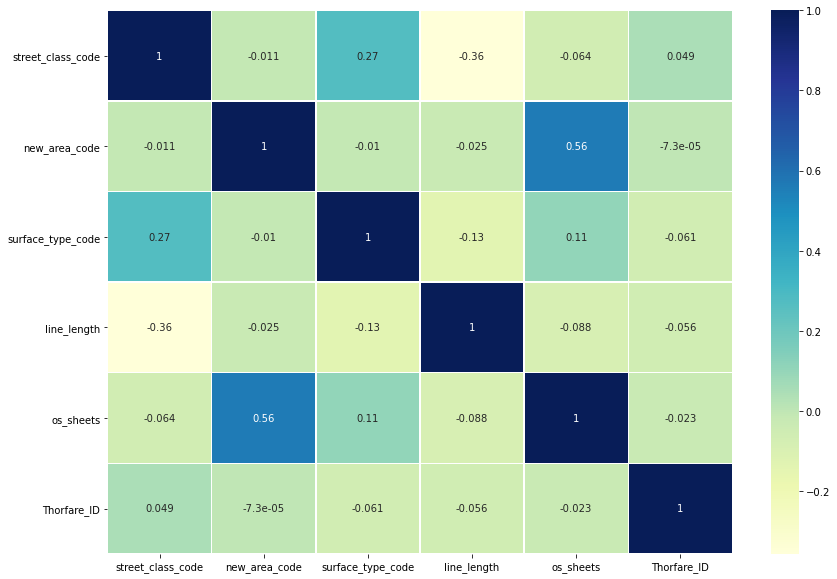

In [15]:
# correlation between features 
correlation = full_dataset.corr()
# print(correlation)

# plotting heatmap to see the correlation for better understanding
plt.figure(figsize = (14,10))
sns.heatmap(correlation, annot = True, linecolor = "white",lw=0.5, cmap = "YlGnBu")

In [16]:
# drop all rows with all values are missing
full_dataset = full_dataset.dropna(axis = 0, how ='all')

In [17]:
# Dropping observations missing 2 or 3 values
full_dataset = full_dataset.dropna(subset=['street_class_code', 'surface_type_code','in_charge','line_length','Subarea'])
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4665 entries, 0 to 5072
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   street_name        4665 non-null   object 
 1   street_class_code  4665 non-null   float64
 2   new_area_code      4665 non-null   int64  
 3   surface_type_code  4665 non-null   float64
 4   Subarea            4665 non-null   object 
 5   Subarea EA         4647 non-null   object 
 6   line_length        4665 non-null   float64
 7   os_sheets          4026 non-null   float64
 8   Thorfare_ID        4665 non-null   int64  
 9   in_charge          4665 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 400.9+ KB


In [18]:
# calling the function created previously to check for missing data 
missing_data()

,missing_count,missing_ratio
Subarea EA,18,0.003859
os_sheets,639,0.136977


In [19]:
# dropping Subarea and os_sheets as its missing so many values there is no correlation relevant 
full_dataset=full_dataset.drop(["Subarea EA","in_charge"], axis=1)

In [20]:
# Checking for missing data
missing_data()

,missing_count,missing_ratio
os_sheets,639,0.136977


In [21]:
# Print the final dataset
full_dataset.head()

,street_name,street_class_code,new_area_code,surface_type_code,Subarea,line_length,os_sheets,Thorfare_ID
0,ABBEY PARK,6.0,3,2.0,14,172.0,319805.0,252533
1,ABBEY STREET LOWER,3.0,1,1.0,15,315.0,326401.0,122560
2,ABBEY STREET MIDDLE,3.0,1,1.0,12,251.0,326305.0,128737
3,OLD ABBEY STREET,6.0,1,2.0,15,156.0,326401.0,30277
4,ABBEY STREET UPPER,3.0,1,1.0,12,321.0,326305.0,47202


<h3>Organizing categorical data as per documentation from Dublin City Concil

In [22]:
# Handling categorical features as per documentation
# Changing extra numbers to numbers in the datapoints 
full_data = full_dataset
full_data['street_class_code'] = full_data['street_class_code'].replace([1.5,5.0,6.0,7.0],[1.0,4.0,4.0,4.0])
full_data['new_area_code'] = full_data['new_area_code'].replace([3,4,5],[2,3,4])

test0 = full_data
full_data

,street_name,street_class_code,new_area_code,surface_type_code,Subarea,line_length,os_sheets,Thorfare_ID
0,ABBEY PARK,4.0,2,2.0,14,172.0,319805.0,252533
1,ABBEY STREET LOWER,3.0,1,1.0,15,315.0,326401.0,122560
2,ABBEY STREET MIDDLE,3.0,1,1.0,12,251.0,326305.0,128737
3,OLD ABBEY STREET,4.0,1,2.0,15,156.0,326401.0,30277
4,ABBEY STREET UPPER,3.0,1,1.0,12,321.0,326305.0,47202
...,...,...,...,...,...,...,...,...
4979,KYLEMORE WAY,4.0,3,1.0,5,790.0,326219.0,30734
4980,KINGSLAND LANE,4.0,4,2.0,12,72.0,326320.0,30763
4984,BEAUMONT WOODS,4.0,2,1.0,6,598.0,313218.0,27094747
4987,HAZEL LANE,4.0,2,3.0,5,8.0,319916.0,32287548


In [23]:
# Changing numbers to names in the datapoints
names_df = full_data

names_df["street_class_code"]= names_df["street_class_code"].replace([1.0,2.0,3.0,4.0],[
    'NATIONAL PRIMARY', 
    'NATIONAL SECUNDARY', 
    'REGIONAL', 
    'LOCAL ROAD'
])

names_df["new_area_code"]= names_df["new_area_code"].replace([1,2,3,4],[
    'CENTRAL', 
    'NORTH WEST',
    'SOUTH CENTRAL', 
    'SOUTH EAST'
])

names_df["surface_type_code"]= names_df["surface_type_code"].replace([1,2,3,4,5],[
   'ASPHALT', 
    'CONCRETE', 
    'MACADAM', 
    'SETS', 
    'FLAGS'
])

# Re-seting the index
names_df1 = names_df.reset_index(drop=True)
names_df1

,street_name,street_class_code,new_area_code,surface_type_code,Subarea,line_length,os_sheets,Thorfare_ID
0,ABBEY PARK,LOCAL ROAD,NORTH WEST,CONCRETE,14,172.0,319805.0,252533
1,ABBEY STREET LOWER,REGIONAL,CENTRAL,ASPHALT,15,315.0,326401.0,122560
2,ABBEY STREET MIDDLE,REGIONAL,CENTRAL,ASPHALT,12,251.0,326305.0,128737
3,OLD ABBEY STREET,LOCAL ROAD,CENTRAL,CONCRETE,15,156.0,326401.0,30277
4,ABBEY STREET UPPER,REGIONAL,CENTRAL,ASPHALT,12,321.0,326305.0,47202
...,...,...,...,...,...,...,...,...
4660,KYLEMORE WAY,LOCAL ROAD,SOUTH CENTRAL,ASPHALT,5,790.0,326219.0,30734
4661,KINGSLAND LANE,LOCAL ROAD,SOUTH EAST,CONCRETE,12,72.0,326320.0,30763
4662,BEAUMONT WOODS,LOCAL ROAD,NORTH WEST,ASPHALT,6,598.0,313218.0,27094747
4663,HAZEL LANE,LOCAL ROAD,NORTH WEST,MACADAM,5,8.0,319916.0,32287548


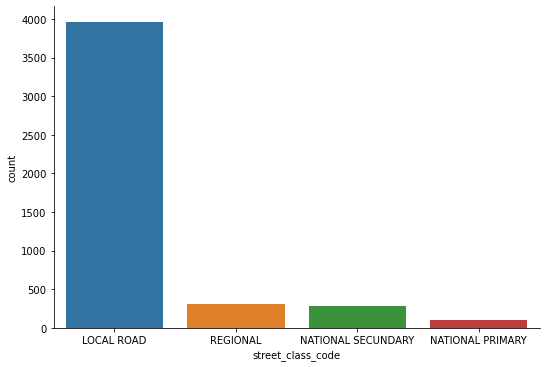

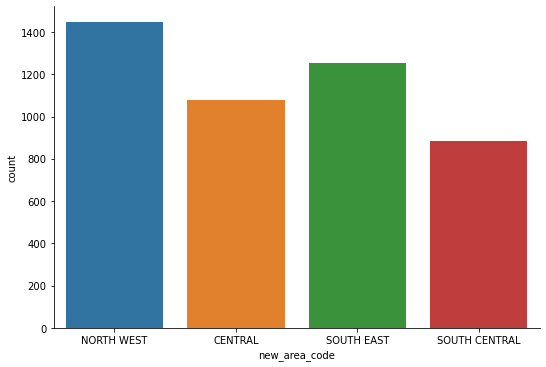

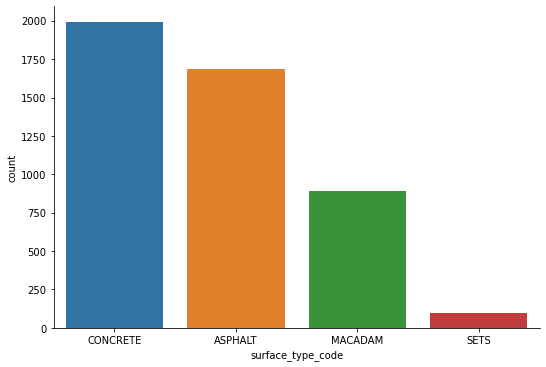

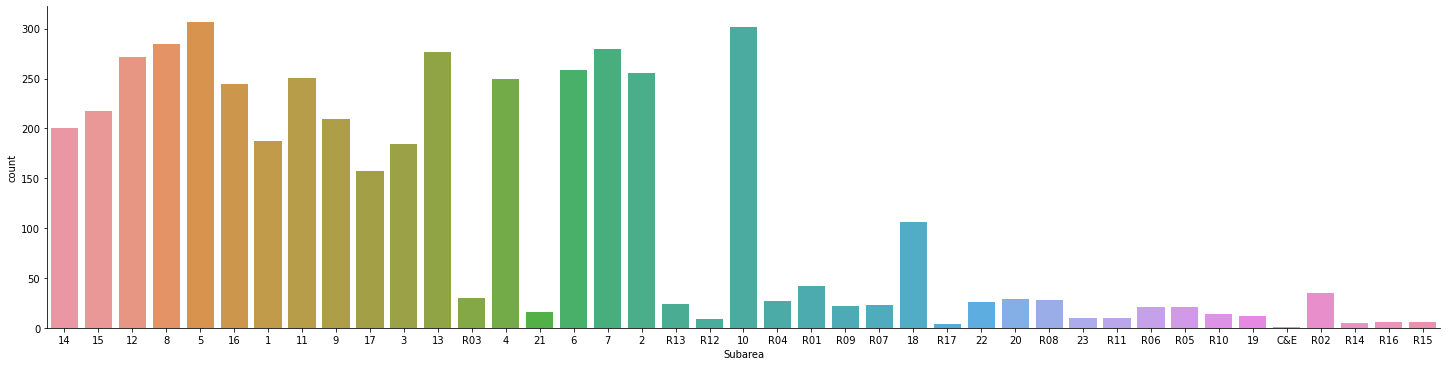

In [24]:
sns.catplot("street_class_code", data=names_df1, kind="count", aspect=1.5) 
sns.catplot("new_area_code", data=names_df1, kind="count", aspect=1.5) 
sns.catplot("surface_type_code", data=names_df1, kind="count", aspect=1.5) 
sns.catplot("Subarea", data=names_df1, kind="count", aspect=4) 

In [25]:
# Checking for categorical data 
names_df1.nunique(axis = 0)

street_name          3790
street_class_code       4
new_area_code           4
surface_type_code       4
Subarea                41
line_length           830
os_sheets             252
Thorfare_ID          3852
dtype: int64

In [26]:
data_names = names_df1
data_num = full_data

<h3>Normalization and Standardization

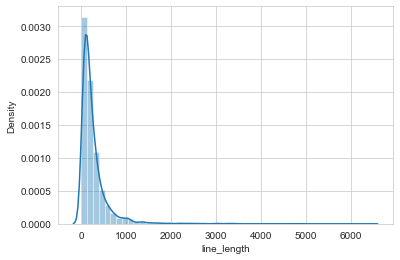

In [27]:
# Applying normalization and standardization on line_length feature as is the only continues data
sns.set_style("whitegrid")
sns.distplot(full_data['line_length']);

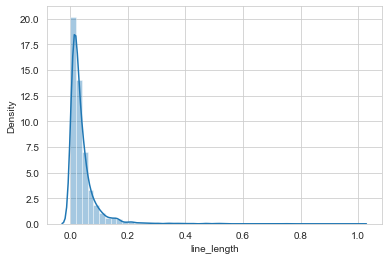

In [28]:
# Simple Feature Scaling
data3 = full_data.copy()
data3['line_length'] = data3['line_length']/data3['line_length'].max()
sns.distplot(data3['line_length']);

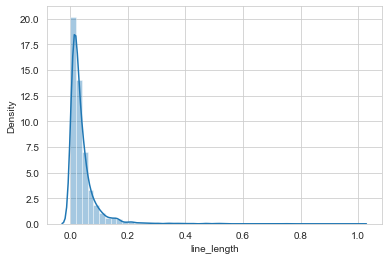

In [29]:
# Min Max 
data4 = full_data.copy()
data4['line_length'] = (data4['line_length']-data4['line_length'].min())/(data4['line_length'].max()-data4['line_length'].min())
sns.distplot(data4['line_length']);

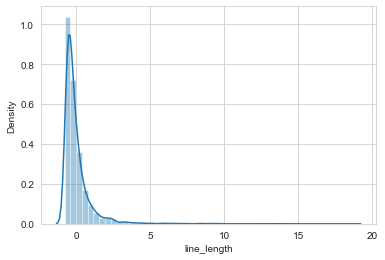

In [30]:
# Standardization — Z-score
data5 = full_data.copy()
data5['line_length'] = (data5['line_length']-data5['line_length'].mean())/data5['line_length'].std()
data5['line_length'].head()
sns.distplot(data5['line_length']);

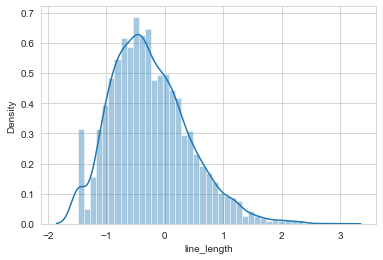

In [31]:
# log transformation
data6 = full_data.copy()
data6['line_length'] = np.log1p(data5['line_length'])
sns.distplot(data6['line_length']);

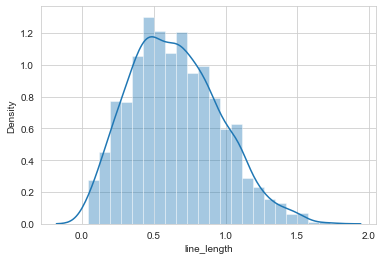

In [32]:
# Square root transformation
data7 = full_data.copy()
data7['line_length']=data6.line_length**(1/2)
sns.distplot(data7['line_length']);

<h2>Applying Machine Learning Algorithms

<h3> Naive Bayes Classification

In [33]:
# Changing numbers to names in the datapoints
full_data2 = names_df

full_data2["street_class_code"]= full_data2["street_class_code"].replace([
    'NATIONAL PRIMARY', 
    'NATIONAL SECUNDARY', 
    'REGIONAL', 
    'LOCAL ROAD'
],[1,2,3,4])

full_data2["new_area_code"]= full_data2["new_area_code"].replace([
    'CENTRAL', 
    'NORTH WEST',
    'SOUTH CENTRAL', 
    'SOUTH EAST'
],[1,2,3,4])

full_data2["surface_type_code"]= full_data2["surface_type_code"].replace([
   'ASPHALT', 
    'CONCRETE', 
    'MACADAM', 
    'SETS', 
    'FLAGS'
],[1,2,3,4,5])

# Re-seting the index
full_data2 = full_data2.reset_index(drop=True)
full_data2

,street_name,street_class_code,new_area_code,surface_type_code,Subarea,line_length,os_sheets,Thorfare_ID
0,ABBEY PARK,4,2,2,14,172.0,319805.0,252533
1,ABBEY STREET LOWER,3,1,1,15,315.0,326401.0,122560
2,ABBEY STREET MIDDLE,3,1,1,12,251.0,326305.0,128737
3,OLD ABBEY STREET,4,1,2,15,156.0,326401.0,30277
4,ABBEY STREET UPPER,3,1,1,12,321.0,326305.0,47202
...,...,...,...,...,...,...,...,...
4660,KYLEMORE WAY,4,3,1,5,790.0,326219.0,30734
4661,KINGSLAND LANE,4,4,2,12,72.0,326320.0,30763
4662,BEAUMONT WOODS,4,2,1,6,598.0,313218.0,27094747
4663,HAZEL LANE,4,2,3,5,8.0,319916.0,32287548


In [34]:
# Spliting the dataset into independent and dependent variables
X = full_data2[["new_area_code"]].values
y = full_data2['surface_type_code'].values 
print(X, y)

[[2]
 [1]
 [1]
 ...
 [2]
 [2]
 [2]] [2 1 1 ... 1 3 1]


In [35]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 82)

# Display the rows and coulmns of X, y, X_train, y_train, X_test, y_test
X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4665, 1), (4665,), (3732, 1), (3732,), (933, 1), (933,))

In [36]:
# Create and initialise an object sc by calling a method StandardScaler()
sc = StandardScaler()

# Train the model by calling a method fit_transform()
X_train = sc.fit_transform(X_train)

# Transforms the test data
X_test = sc.transform(X_test)

In [37]:
# Create and initialise an object sc by calling a method StandardScaler()
sc = StandardScaler()

# Train the model by calling a method fit_transform()
X_train = sc.fit_transform(X_train)

# Transforms the test data
X_test = sc.transform(X_test)

In [38]:
X_train, X_test

(array([[ 0.45894467],
        [-0.4359255 ],
        [-0.4359255 ],
        ...,
        [ 1.35381483],
        [-0.4359255 ],
        [-1.33079567]]),
 array([[ 0.45894467],
        [ 1.35381483],
        [ 1.35381483],
        [-1.33079567],
        [-1.33079567],
        [-0.4359255 ],
        [ 0.45894467],
        [-0.4359255 ],
        [-0.4359255 ],
        [-1.33079567],
        [-1.33079567],
        [ 1.35381483],
        [ 1.35381483],
        [-1.33079567],
        [ 0.45894467],
        [-1.33079567],
        [ 0.45894467],
        [ 1.35381483],
        [-1.33079567],
        [-0.4359255 ],
        [-0.4359255 ],
        [ 0.45894467],
        [ 1.35381483],
        [ 0.45894467],
        [-1.33079567],
        [ 1.35381483],
        [-0.4359255 ],
        [ 0.45894467],
        [-1.33079567],
        [-0.4359255 ],
        [ 0.45894467],
        [-0.4359255 ],
        [-1.33079567],
        [-0.4359255 ],
        [-0.4359255 ],
        [ 1.35381483],
        [-0.4359255

In [39]:
# Create and initialise an object sc by calling a method GaussianNB()
nvclassifier = GaussianNB()

# Train the model by calling a method fit()
nvclassifier.fit(X_train, y_train)

GaussianNB()

In [40]:
# Predicting the Test set results
y_pred = nvclassifier.predict(X_test)

# Display the predicted values
print(y_pred)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

In [41]:
# Predicting the Test set results
y_pred = nvclassifier.predict(X_test)

# Display the predicted values
print(y_pred)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

In [42]:
# Check the actual and predicted value side by side
y_compare = np.vstack((y_test, y_pred)).T
# actual value on the left side and predicted value on the right hand side
# printing the top 10 values
y_compare[:30, :]

array([[1, 2],
       [1, 2],
       [2, 2],
       [1, 2],
       [2, 2],
       [1, 2],
       [2, 2],
       [2, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [1, 2],
       [3, 2],
       [2, 2],
       [2, 2],
       [1, 2],
       [2, 2],
       [1, 2],
       [1, 2],
       [3, 2],
       [2, 2],
       [2, 2],
       [1, 2],
       [1, 2],
       [3, 2],
       [3, 2],
       [2, 2],
       [2, 2],
       [3, 2],
       [2, 2]])

<h3>Confusion Matrix

In [43]:
# Construct the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  0 350   0   0]
 [  0 405   0   0]
 [  0 162   0   0]
 [  0  16   0   0]]


In [44]:
# Find an accuracy from the confusion matrix.
rowsCols = cm.shape
corrPred = 0
falsePred = 0

for row in range(rowsCols[0]):
    for col in range(rowsCols[1]):
        if row == col:
            corrPred += cm[row, col]
        else:
            falsePred += cm[row, col]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print ('\n\nAccuracy of the Naive Bayes Clasification is: ', corrPred/(cm.sum())) 

Correct predictions:  405
False predictions 528


Accuracy of the Naive Bayes Clasification is:  0.4340836012861736


<h3>Cross Validation

In [45]:
nvclassifier = GaussianNB()
cross_val_score(nvclassifier, X, y, scoring='accuracy', cv = 50).mean()

0.4272294669412034

<h1>Decision Tree</h1>

In [46]:
fulldata=full_data2
fulldata.head()

,street_name,street_class_code,new_area_code,surface_type_code,Subarea,line_length,os_sheets,Thorfare_ID
0,ABBEY PARK,4,2,2,14,172.0,319805.0,252533
1,ABBEY STREET LOWER,3,1,1,15,315.0,326401.0,122560
2,ABBEY STREET MIDDLE,3,1,1,12,251.0,326305.0,128737
3,OLD ABBEY STREET,4,1,2,15,156.0,326401.0,30277
4,ABBEY STREET UPPER,3,1,1,12,321.0,326305.0,47202


In [47]:
# split dataset in features and target variable
feature_cols = ['street_class_code']

X = fulldata[feature_cols] # Features
y = fulldata.surface_type_code # Target variable

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 

In [49]:
# creating decision tree classifier object 
clf = DecisionTreeClassifier()

# train decision tree classifier 
clf = clf.fit(X_train, y_train)

# predict the response for test dataset 
y_pred = clf.predict(X_test)

In [50]:
# model accuracy, how often is the classifier correct?
print("Acurracy", metrics.accuracy_score(y_test, y_pred))

Acurracy 0.5016077170418006


In [51]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5016077170418006


## Support Vector Machines

In [52]:
# Load the dataset
dataset4 = fulldata.drop(["street_name","Subarea","line_length","os_sheets","Thorfare_ID"], axis=1)

# Create independent and dependent variables
X = np.asarray(dataset4.drop('street_class_code', 1))
y = np.asarray(dataset4['surface_type_code'])

# Replace 0 value in the target variable with -1
y[y == 0] = -1
X, y

(array([[2, 2],
        [1, 1],
        [1, 1],
        ...,
        [2, 1],
        [2, 3],
        [2, 1]]),
 array([2, 1, 1, ..., 1, 3, 1]))

In [53]:
# Display the number of rows and columns
X.shape, y.shape

((4665, 2), (4665,))

In [54]:
# Display first 20 values
y[0:20]

array([2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 1, 3, 3, 3, 2])

In [55]:
# Split the dataset into training and testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [56]:
# Create an object sc by calling a method StandardScaler
sc = StandardScaler()

# Normalize the data by calling a fit_transform() method
X_train_normalized = sc.fit_transform(X_train)
X_test_normalized = sc.transform(X_test)

In [57]:
# Create an object svmModel by calling a method SVC()
svmModel = SVC(kernel = 'poly',C = 2, gamma = 0.9)

# Train the model by calling a method fit()
svmModel.fit(X_train_normalized,y_train)

# Store the predicted values into y_pred
Y_pred = svmModel.predict(X_test_normalized)

# Display the accuracy upto 2 decimal places
print('Accuracy in Support Vector Machine is = ', round(accuracy_score(y_test, Y_pred)*100,2))

Accuracy in Support Vector Machine is =  100.0
